# Bike Sharing Demand

<img src="bike.png" width="600">

In this project, the goal is to forecast the hourly usage (demand count) of a city bike-share system in Washington, D.C. The dataset is from a "Kaggle competition," and the task is a "**regression**" problem. The target variable is "**count**" (the total number of rentals).

## Data Fields

* `datetime`: hourly date + timestamp
* `season`: (1: spring, 2: summer, 3: fall, 4: winter)
* `holiday`: whether the day is considered a holiday (0 or 1)
* `workingday`: whether the day is neither a weekend nor holiday (0 or 1)
* `weather`: (1: Clear, 2: Mist/Cloudy, 3: Light Snow/Rain, 4: Heavy Rain/Snow)
* `temp`: temperature in Celsius
* `atemp`: "feels like" temperature in Celsius
* `humidity`: relative humidity
* `windspeed`: wind speed
* `casual`: number of non-registered user rentals initiated
* `registered`: number of registered user rentals initiated
* `count`: (Target) total number of bike rentals (casual + registered)

The dataset was taken from Kaggle.

[Kaggle | Bike Sharing Demand](https://www.kaggle.com/competitions/bike-sharing-demand/overview)

## Data Read

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## EDA - Exploratory Data Analysis

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

In [5]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [9]:
## Feature Engineering

In [10]:
for dt in [df, test]:
    dt['datetime'] = pd.to_datetime(dt['datetime'])
    dt['hour'] = dt['datetime'].dt.hour
    dt['day'] = dt['datetime'].dt.day
    dt['month'] = dt['datetime'].dt.month
    dt['year'] = dt['datetime'].dt.year
    dt['dayofweek'] = dt['datetime'].dt.dayofweek

In [11]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,2011,5


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

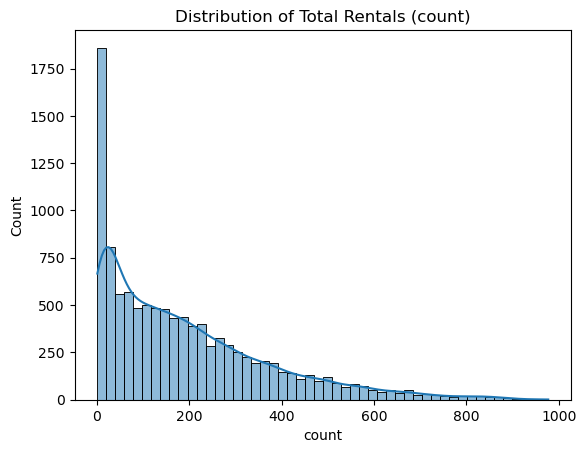

In [14]:
sns.histplot(df['count'], kde=True, bins=50)
plt.title('Distribution of Total Rentals (count)')
plt.show()

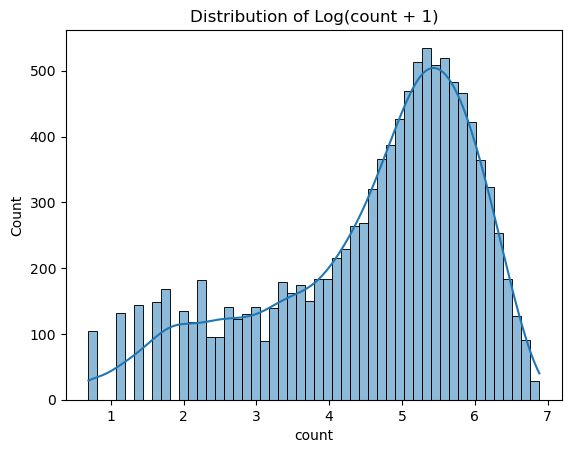

In [15]:
sns.histplot(np.log1p(df['count']), kde=True, bins=50)
plt.title('Distribution of Log(count + 1)')
plt.show()

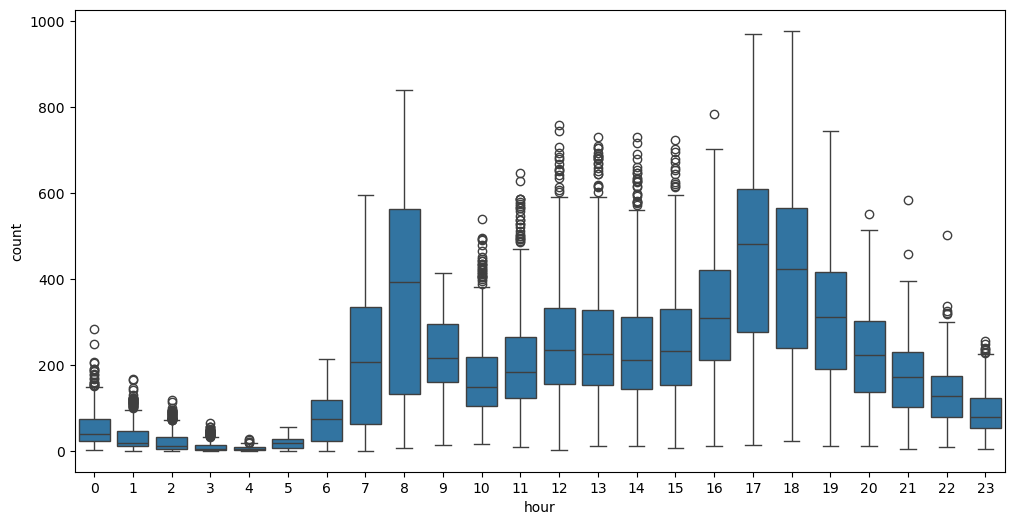

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='hour', y='count')
plt.show()

<Axes: xlabel='dayofweek', ylabel='count'>

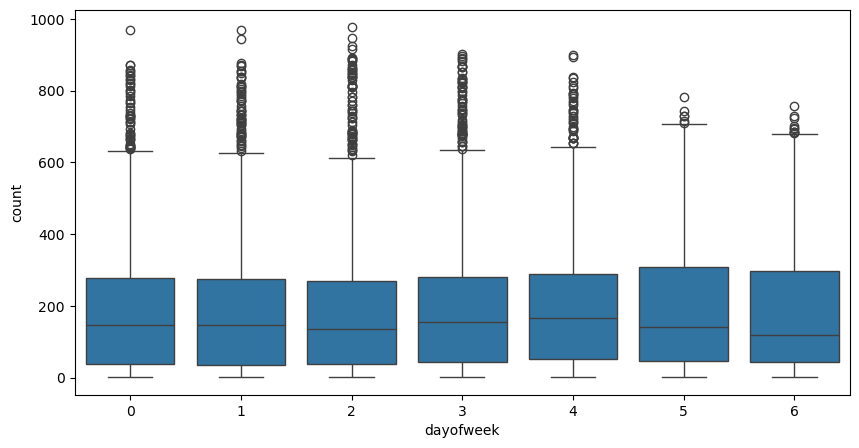

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='dayofweek', y='count')

<Axes: xlabel='month', ylabel='count'>

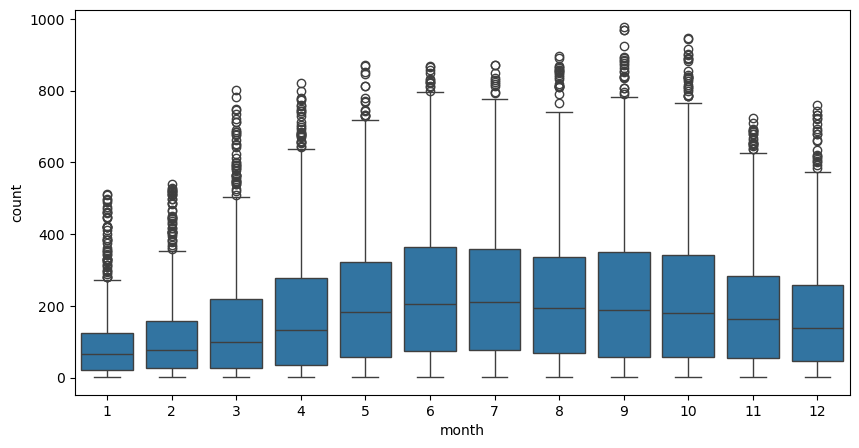

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='month', y='count')

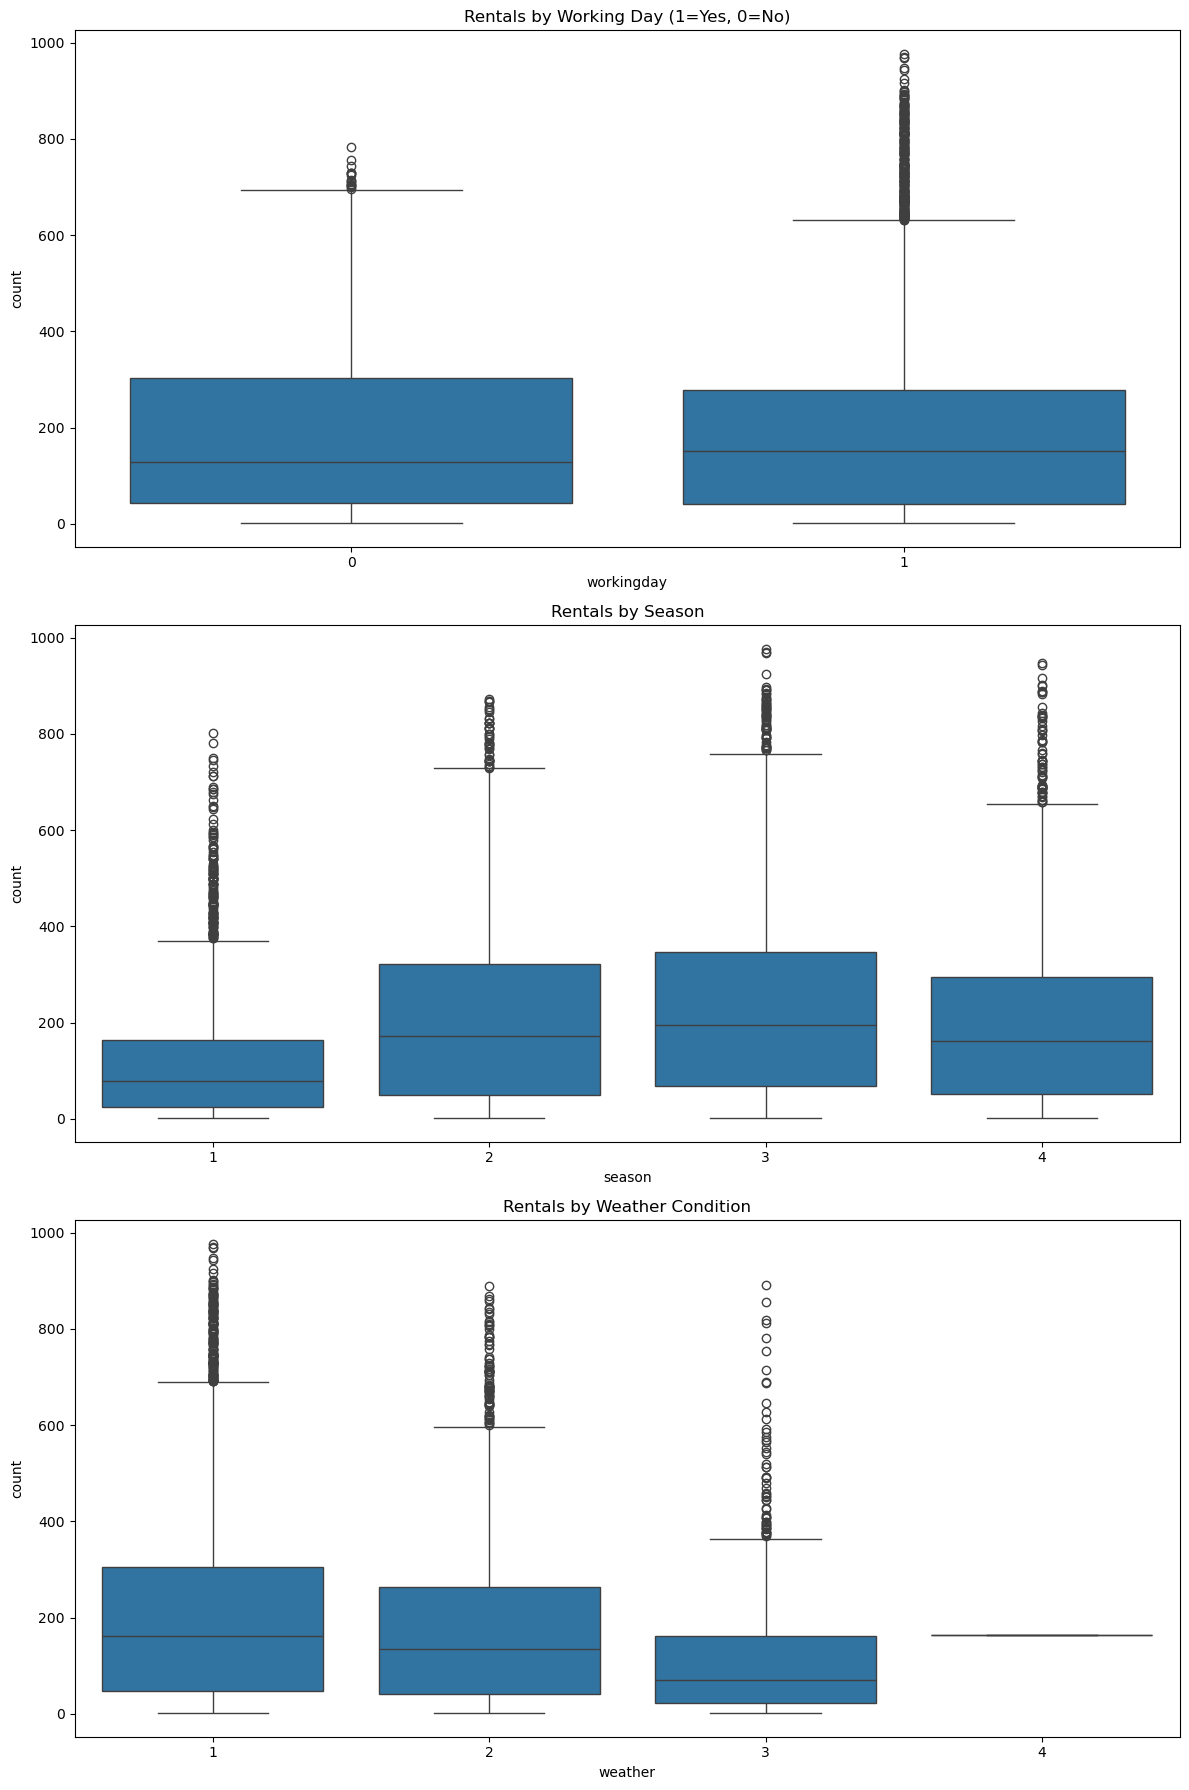

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(12, 18))

sns.boxplot(data=df, x='workingday', y='count', ax=ax1)
ax1.set_title('Rentals by Working Day (1=Yes, 0=No)')

sns.boxplot(data=df, x='season', y='count', ax=ax2)
ax2.set_title('Rentals by Season')

sns.boxplot(data=df, x='weather', y='count', ax=ax3)
ax3.set_title('Rentals by Weather Condition')

plt.tight_layout()
plt.show()

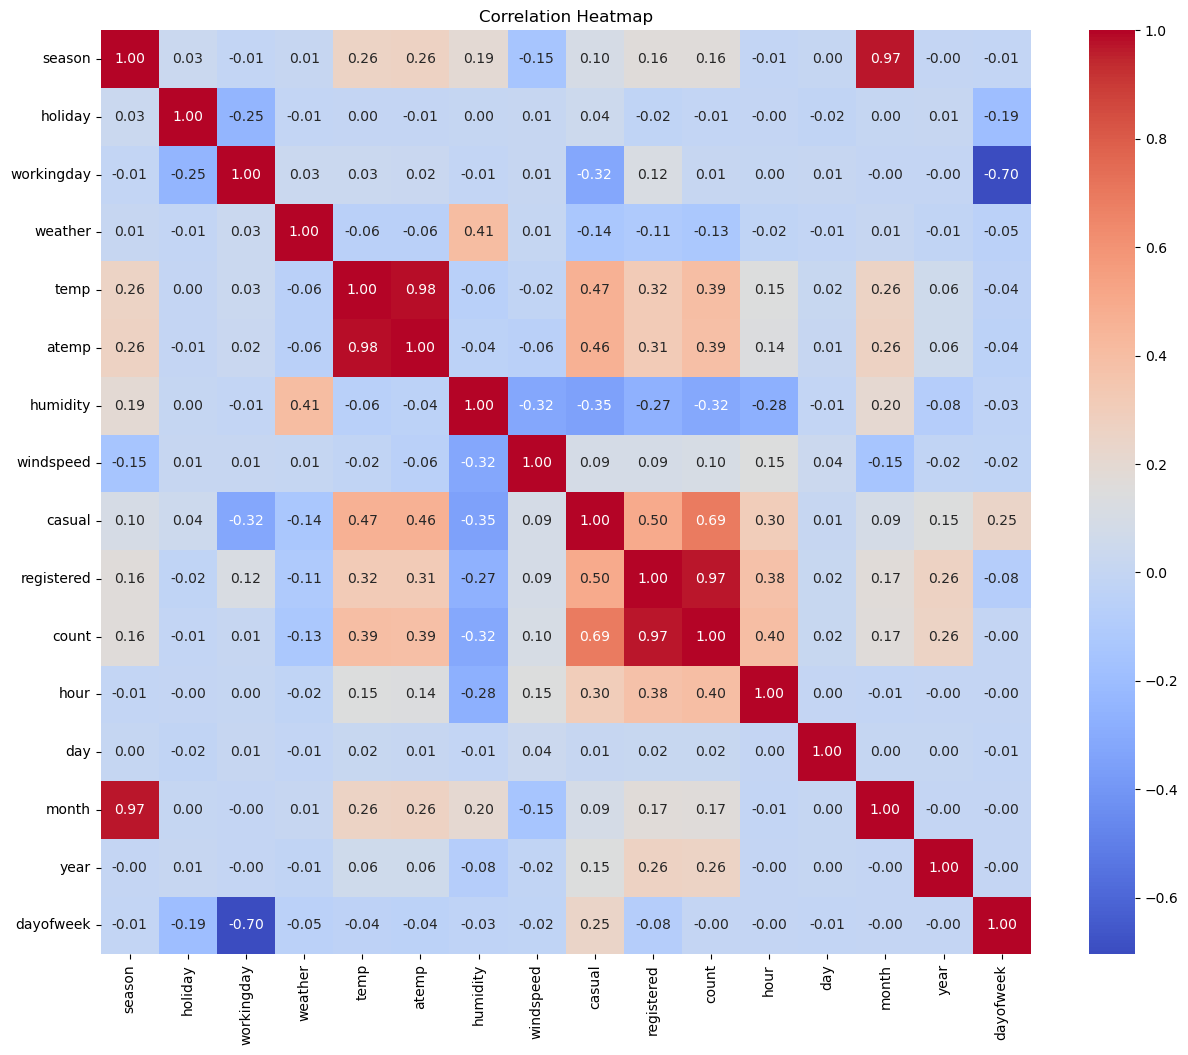

In [20]:
df_numeric = df.drop(columns=['datetime'])
plt.figure(figsize=(15, 12))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Modelling

In [23]:
x = df.drop(columns=['count', 'datetime', 'casual', 'registered'])
y = df['count']

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
    
        x=MinMaxScaler().fit_transform(x)
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [25]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.957754,37.341741,24.041912
Decision Tree,0.901170,57.114681,33.180441
Extra Tree,0.874412,64.383935,38.152433
Gradient Boosting,0.858428,68.358350,46.102640
KNeighborsRegressor,0.662593,105.530897,87.642744
AdaBoost,0.603676,114.374071,76.661433
mlp_regressor,0.484902,130.391039,95.972398
Ridge,0.395936,141.203035,105.289256
Linear,0.395871,141.210609,105.299441
SGD,0.394661,141.351993,104.551784


## Conclusion

In this project, a regression analysis was conducted to predict the bike rental demand (`count`) in Washington D.C. After deriving temporal features such as hour, day, and month from the `datetime` column, **13 different regression models** were tested.

When comparing the models using $R^2$ (R-Squared), RMSE (Root Mean Squared Error), and MAE (Mean Absolute Error) metrics, the **`XGBRegressor`** model clearly outperformed all other algorithms.

With an $R^2$ score of approximately **0.958** and an **RMSE of 37.34**, `XGBRegressor` proved to be the most successful model. This demonstrates the strong capability of tree-based and boosting algorithms in capturing complex, non-linear relationships in time-dependent and seasonal demand patterns such as bike rentals.
